In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
m = 14             # longitud del genotipo
pob_size = 50      # tamaño de la población 
a = -5           # valor mínimo de x
b = 5             # valor máximo de x
decimales=3        # número de decimales
n = 2              # variables a considerar
t = m * n          # total de bits 
epsilon = 1e-6     # cota de selección
proba_cruza = 0.8  # probabilidad de cruza
proba_muta = 1/t  # probabilidad de mutación
generaciones = 100 # número de generaciones
target = 0         # objetivo de minimización 

In [3]:
def gen_pop(pob_size, t):
    return np.random.randint(0, 2, (pob_size, t))

In [4]:
pob = gen_pop(pob_size, t)
print("Población:")
print(pob)

Población:
[[1 1 0 ... 0 1 0]
 [0 1 1 ... 0 1 0]
 [0 1 0 ... 1 1 0]
 ...
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 0 0 1]
 [0 1 0 ... 1 0 1]]


In [5]:
def deco(genotipo): 
    powers = 2 ** np.arange(m-1, -1, -1)
    return np.dot(genotipo, powers)


In [6]:
def deco_ind(ind, m, a, b, decimales):
    decoded = []
    for i in range(n):
        start = i * m
        end = start + m
        gene = ind[start:end]
        valor_deco = deco(gene)
        x = a + valor_deco * (b - a) / (2**m - 1)
        decoded.append(round(x, decimales))
    return np.array(decoded)


In [7]:
def funcion(x,y):
    return (x**2 + y - 11)**2 + (x + y**2 - 7)**2

In [8]:
def eva_funcion(ind, a, b, m, decimales):
    x,y = deco_ind(ind, a, b, m, decimales)
    return funcion(x,y)

In [9]:
def main():
    
    for idx, ind in enumerate(pob):
        decoded = deco_ind(ind, m, a, b, decimales)
        evaluation = eva_funcion(ind, m, a, b, decimales)
        print(f"\nIndividuo {idx+1}:")
        print("Genotipo:", ind)
        print("Fenotipo:", decoded)
        print("Evaluación f(x):", evaluation)

if __name__ == "__main__":
    main()



Individuo 1:
Genotipo: [1 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 1 0 0 0 0 1 0]
Fenotipo: [2.657 0.744]
Evaluación f(x): 24.576697122496995

Individuo 2:
Genotipo: [0 1 1 0 0 0 1 1 1 1 0 0 0 1 1 1 0 0 1 0 0 1 1 0 0 0 1 0]
Fenotipo: [-1.103  2.873]
Evaluación f(x): 47.776343747522

Individuo 3:
Genotipo: [0 1 0 0 0 0 1 1 0 1 1 1 0 1 0 0 1 1 1 0 0 0 1 1 0 1 1 0]
Fenotipo: [-2.365 -2.779]
Evaluación f(x): 69.70359853190598

Individuo 4:
Genotipo: [0 0 1 1 0 1 0 0 0 0 0 1 1 0 1 0 0 1 1 1 1 0 0 1 0 0 1 1]
Fenotipo: [-2.965  1.184]
Evaluación f(x): 74.37759896536099

Individuo 5:
Genotipo: [0 1 1 1 0 1 0 1 1 0 0 0 0 1 0 0 0 0 1 1 0 1 0 1 0 0 0 1]
Fenotipo: [-0.409 -4.482]
Evaluación f(x): 395.3058751459371

Individuo 6:
Genotipo: [0 1 1 1 1 1 1 0 0 0 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 0 0 1]
Fenotipo: [-0.074 -0.478]
Evaluación f(x): 178.479896236832

Individuo 7:
Genotipo: [0 0 1 1 0 0 1 1 0 1 1 0 1 0 1 0 0 1 1 1 1 0 1 1 1 0 0 1]
Fenotipo: [-2.992  1.207]
Evaluación f(x): 73.55597594889697

In

In [10]:
def SUS(pob, m, a, b, decimales, epsilon):
    aptitudes = []
    for ind in pob:
        f_val = eva_funcion(ind, m, a, b, decimales)
        aptitud = 1/(f_val + epsilon)  # función de evaluación de aptitud
        aptitudes.append(aptitud)
    aptitudes = np.array(aptitudes)
    
    total_aptitud = np.sum(aptitudes) # suma acumulada de aptitudes
    probas = aptitudes / total_aptitud
    
    
    acc_n = np.cumsum(probas) # acumulado de las sumas
    
    punto = 1/pob_size
    t = np.random.rand() * punto
    pt = t +np.arange(pob_size) * punto

    selecto_index = []
    selecto_ind = []
    index = 0
    for punto in pt: # se va hasta el acumulado, cuando coincida con el punto
        
        while acc_n[index] < punto:
            index += 1
        selecto_index.append(index)
        selecto_ind.append(pob[index])
    
    return selecto_ind, selecto_index

In [11]:
def cruzar(padre1, padre2, prob_cruza):
    if np.random.rand() < prob_cruza:
        point = np.random.randint(1, len(padre1))
        hijo1 = np.concatenate((padre1[:point], padre2[point:]))
        hijo2 = np.concatenate((padre2[:point], padre1[point:]))
        return hijo1, hijo2
    else:
        return padre1.copy(), padre2.copy()

In [12]:
def mutar(ind, prob_muta):
    mutante = ind.copy()
    for i in range(len(mutante)):
        if np.random.rand() < prob_muta:
            mutante[i] = 1 - mutante[i]
    return mutante

In [13]:
def main():
    new_pob = []
    
    
    while len(new_pob) < pob_size:
            padre1, _ = SUS(pob, m, a, b, decimales, epsilon)
            padre2, _ = SUS(pob, m, a, b, decimales, epsilon)

            hijo1, hijo2 = cruzar(padre1, padre2, proba_cruza)
            
            hijo1 = mutar(hijo1, proba_muta)
            hijo2 = mutar(hijo2, proba_muta)

            new_pob.append(hijo1)
            if len(new_pob) < pob_size:
                new_pob.append(hijo2)
    
    new_pob = np.array(new_pob)
    print("Nueva población tras cruza y mutación:")
    print(new_pob)

if __name__ == "__main__":
    main()

Nueva población tras cruza y mutación:
[[[0 0 1 ... 1 0 1]
  [1 1 0 ... 0 1 0]
  [1 1 0 ... 0 1 0]
  ...
  [1 1 0 ... 0 0 0]
  [0 0 1 ... 0 1 1]
  [1 1 1 ... 0 0 1]]

 [[1 1 0 ... 0 1 0]
  [1 1 0 ... 0 1 0]
  [1 1 0 ... 0 1 0]
  ...
  [1 1 0 ... 0 0 0]
  [1 0 0 ... 0 0 1]
  [0 1 0 ... 1 0 1]]

 [[1 1 0 ... 0 1 0]
  [1 1 0 ... 0 1 0]
  [1 1 0 ... 0 1 0]
  ...
  [1 1 0 ... 0 0 0]
  [1 1 0 ... 1 0 0]
  [1 1 1 ... 0 0 1]]

 ...

 [[1 1 0 ... 0 1 0]
  [1 1 0 ... 0 1 0]
  [0 1 1 ... 0 1 0]
  ...
  [0 0 1 ... 0 1 1]
  [1 1 1 ... 1 1 1]
  [0 1 0 ... 1 0 1]]

 [[1 1 0 ... 0 1 0]
  [1 1 0 ... 0 1 0]
  [1 1 0 ... 0 1 0]
  ...
  [0 0 1 ... 0 1 1]
  [1 1 1 ... 0 0 1]
  [0 1 0 ... 1 0 1]]

 [[1 1 0 ... 0 1 0]
  [1 1 0 ... 0 1 0]
  [0 1 1 ... 0 1 0]
  ...
  [0 0 1 ... 0 1 1]
  [1 1 1 ... 1 1 1]
  [0 1 0 ... 1 0 1]]]


Generación 1 - Mejor evaluación: 0.012
Generación 2 - Mejor evaluación: 0.012
Generación 3 - Mejor evaluación: 0.011
Generación 4 - Mejor evaluación: 0.004
Generación 5 - Mejor evaluación: 0.003
Generación 6 - Mejor evaluación: 0.003
Generación 7 - Mejor evaluación: 0.002
Generación 8 - Mejor evaluación: 0.002
Generación 9 - Mejor evaluación: 0.002
Generación 10 - Mejor evaluación: 0.002
Generación 11 - Mejor evaluación: 0.002
Generación 12 - Mejor evaluación: 0.002
Generación 13 - Mejor evaluación: 0.002
Generación 14 - Mejor evaluación: 0.001
Generación 15 - Mejor evaluación: 0.001
Generación 16 - Mejor evaluación: 0.0
se ha alcanzado el objetivo.

Resultado final:
Generaciones: 16
Mejor genotipo: [1 1 0 1 1 0 1 1 1 1 0 0 0 1 0 1 0 1 0 0 0 0 1 0 0 1 0 0]
Mejor fenotipo (x1,...,xn): [ 3.585 -1.853]
Mejor evaluación f(x1,...,xn): 0.0


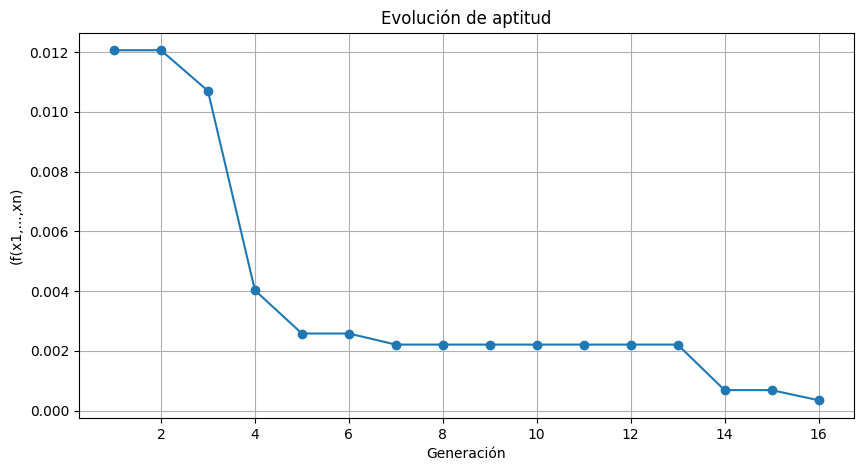

In [14]:
def AG(pob_size, m, a, b, decimales, epsilon, proba_cruza, proba_muta, generaciones, target=0):
    pob = gen_pop(pob_size, t)
    
    mejor_hijo = None
    mejor_aptitud = np.inf
    generacion = 0
    h = [] # diccionario con el historial de aptitudes
     
    while generacion < generaciones:
        generacion += 1
        
        evaluar = [eva_funcion(ind, m, a, b, decimales) for ind in pob]
        mejor_ahora = min(evaluar)
        mejor_var = evaluar.index(mejor_ahora)

        h.append(mejor_ahora) 

        if mejor_ahora < mejor_aptitud:
            mejor_aptitud = mejor_ahora
            mejor_hijo = pob[mejor_var]
        
        print(f"Generación {generacion} - Mejor evaluación: {round(mejor_ahora, decimales)}")
        
        # condición de paro
        if round(mejor_ahora, decimales) <= target:
            print("se ha alcanzado el objetivo.")
            
            break

        selecto_pob, _ = SUS(pob, m, a, b, decimales, epsilon)
        
        # nueva población
        new_pob = []
        for i in range(0, pob_size, 2):
            padre1 = selecto_pob[i]
            padre2 = selecto_pob[i+1]
            
            hijo1, hijo2 = cruzar(padre1, padre2, proba_cruza)
            hijo1 = mutar(hijo1, proba_muta)
            hijo2 = mutar(hijo2, proba_muta)
            
            new_pob.append(hijo1)
            new_pob.append(hijo2)
        pob = np.array(new_pob)
    
    mejor_calificado = eva_funcion(mejor_hijo, m, a, b, decimales)
    return mejor_hijo, mejor_calificado, mejor_aptitud, generacion, h

def main():
    
    mejor_ind, mejor_calificado, mejor_api, generacion, h= AG( pob_size, m, a, b, decimales, epsilon, proba_cruza, proba_muta, generaciones, target)
    
    print("\nResultado final:")
    print("Generaciones:", generacion)
    print("Mejor genotipo:", mejor_ind)
    print("Mejor fenotipo (x1,...,xn):", deco_ind(mejor_ind, m, a, b, decimales))
    print("Mejor evaluación f(x1,...,xn):", round(mejor_api, decimales))
    

    plt.figure(figsize=(10, 5))
    plt.plot(range(1, len(h) + 1), h, marker='o', linestyle='-')
    plt.xlabel("Generación")
    plt.ylabel("(f(x1,...,xn)")
    plt.title("Evolución de aptitud")
    plt.grid(True)
    plt.show()

if __name__ == "__main__":
    main()
